In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-03-10 08:12:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.42.144, 142.251.42.176, 172.217.26.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.42.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  51.5MB/s    in 1.3s    

2022-03-10 08:12:50 (51.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.525.jpg', 'cat.988.jpg', 'cat.864.jpg', 'cat.49.jpg', 'cat.286.jpg']
['dog.822.jpg', 'dog.165.jpg', 'dog.373.jpg', 'dog.973.jpg', 'dog.322.jpg']


In [5]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


In [6]:
%conda install matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
%matplotlib inline

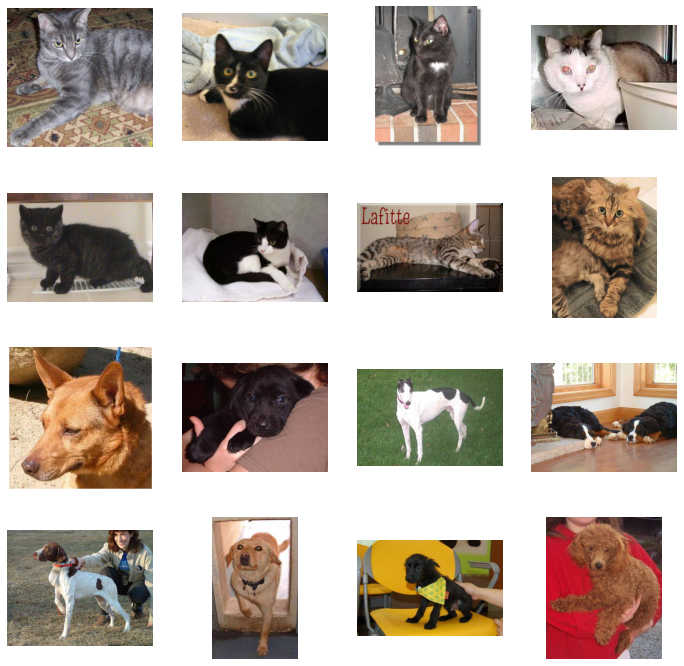

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
%conda install tensorflow-gpu

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf

with tf.device('/device:GPU:0'):
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.summary()

2022-03-10 08:13:07.577111: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-10 08:13:08.483659: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-10 08:13:08.484697: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-10 08:13:08.511196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 08:13:08.512488: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-03-10 08:13:08.512504: I tensorflow/stream_executor/platform/defau

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-03-10 08:13:09.916822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12566099469827341935,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 31589217152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13113863592813343513
 physical_device_desc: "device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:03:00.0, compute capability: 7.0"]

2022-03-10 08:13:09.917162: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-03-10 08:13:09.917203: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-10 08:13:09.917225: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-10 08:13:09.917233: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-03-10 08:13:09.917241: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-03-10 08:13:09.917249: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcura

In [14]:
%conda install keras

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
import keras
import keras.backend as K

print(keras.__version__)
# 2.2.4

tf.config.list_physical_devices('GPU')

2.4.3


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

2022-03-10 08:13:33.607032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-10 08:13:33.607404: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2992965000 Hz


Epoch 1/100


2022-03-10 08:13:34.102348: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-10 08:13:34.366297: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


100/100 - 9s - loss: 0.7661 - accuracy: 0.5600 - val_loss: 0.8482 - val_accuracy: 0.5050
Epoch 2/100
100/100 - 7s - loss: 0.6467 - accuracy: 0.6510 - val_loss: 0.7048 - val_accuracy: 0.5560
Epoch 3/100
100/100 - 7s - loss: 0.5544 - accuracy: 0.7220 - val_loss: 0.5942 - val_accuracy: 0.6960
Epoch 4/100
100/100 - 7s - loss: 0.4771 - accuracy: 0.7745 - val_loss: 0.7609 - val_accuracy: 0.6720
Epoch 5/100
100/100 - 7s - loss: 0.3970 - accuracy: 0.8240 - val_loss: 0.5690 - val_accuracy: 0.7140
Epoch 6/100
100/100 - 7s - loss: 0.3089 - accuracy: 0.8665 - val_loss: 0.6697 - val_accuracy: 0.7060
Epoch 7/100
100/100 - 7s - loss: 0.2307 - accuracy: 0.9035 - val_loss: 0.7137 - val_accuracy: 0.7080
Epoch 8/100
100/100 - 7s - loss: 0.1429 - accuracy: 0.9510 - val_loss: 0.8461 - val_accuracy: 0.7350
Epoch 9/100
100/100 - 7s - loss: 0.1117 - accuracy: 0.9545 - val_loss: 1.0736 - val_accuracy: 0.6790
Epoch 10/100
100/100 - 7s - loss: 0.0827 - accuracy: 0.9720 - val_loss: 1.1019 - val_accuracy: 0.7290
E

Epoch 81/100
100/100 - 7s - loss: 6.9328e-11 - accuracy: 1.0000 - val_loss: 5.9730 - val_accuracy: 0.7290
Epoch 82/100
100/100 - 7s - loss: 7.0593e-11 - accuracy: 1.0000 - val_loss: 5.9765 - val_accuracy: 0.7290
Epoch 83/100
100/100 - 7s - loss: 7.1870e-11 - accuracy: 1.0000 - val_loss: 5.9798 - val_accuracy: 0.7300
Epoch 84/100
100/100 - 7s - loss: 7.2346e-11 - accuracy: 1.0000 - val_loss: 5.9832 - val_accuracy: 0.7300
Epoch 85/100
100/100 - 7s - loss: 7.4035e-11 - accuracy: 1.0000 - val_loss: 5.9865 - val_accuracy: 0.7300
Epoch 86/100
100/100 - 7s - loss: 7.5570e-11 - accuracy: 1.0000 - val_loss: 5.9895 - val_accuracy: 0.7310
Epoch 87/100
100/100 - 7s - loss: 7.6435e-11 - accuracy: 1.0000 - val_loss: 5.9925 - val_accuracy: 0.7300
Epoch 88/100
100/100 - 7s - loss: 7.7636e-11 - accuracy: 1.0000 - val_loss: 5.9954 - val_accuracy: 0.7300
Epoch 89/100
100/100 - 7s - loss: 7.8732e-11 - accuracy: 1.0000 - val_loss: 5.9982 - val_accuracy: 0.7300
Epoch 90/100
100/100 - 7s - loss: 8.0118e-11 -

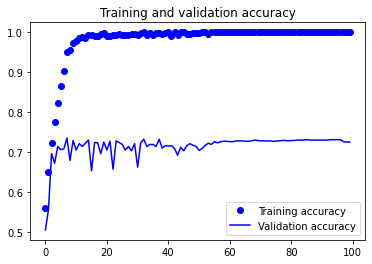

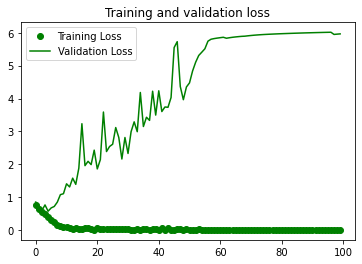

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
model.save("catdog_model.h5")

In [19]:
import numpy as np
from keras.preprocessing import image



In [23]:
path='./Black_b_data/cat3.jpg'
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print(" is a dog")
else:
    print(" is a cat")

[0.]
 is a cat
